In [3]:
import pandas as pd
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import numpy as np
from nltk.probability import FreqDist
import nltk

In [4]:
df = pd.read_csv('assets/artikel.csv')
print(df)

                                                clean
0   provinsi jawa barat indonesia besar tiga indon...
1   catat sejarah salah satu diri guru teknik indo...
2   pilih salah aman dunia dasar survei majalah ti...
3   keliling gunung bentuk morfologi wilayah mangk...
4   alir sungai utama sungai cikapundung sungai ci...
5   geologis tanah bentuk zaman kwartier lapis tan...
6   asal bendung bendung bendung sungai citarum la...
7   dasar filosofi sunda asal kalimat ngabandungan...
8   bumi lahir alam hidup banda alam hidup banda i...
9   geografis keliling gunung telaga danau legenda...
10  daerah sisasisa danau kering situ aksan an dan...
11  jadi kawasan mukim perintah kolonial hindia be...
12  resmi status gemeente gubernur jenderal jb van...
13  perang merdeka maret bakar juang merdeka strat...
14  tanggal april gedung merdeka nama concordia jl...


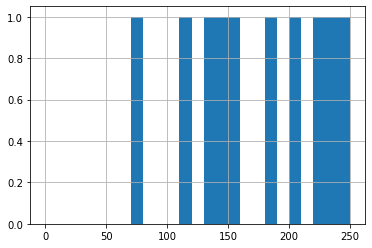

In [5]:
bin_range = np.arange(0, 260, 10)
df['clean'].str.len().hist(bins=bin_range)
plt.show()

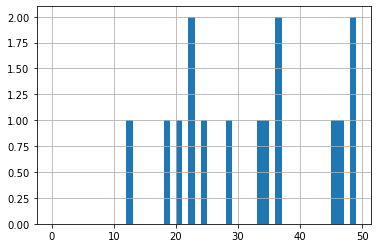

In [6]:
bin_range = np.arange(0, 50)
df['clean'].str.split().map(lambda x: len(x)).hist(bins=bin_range)
plt.show()

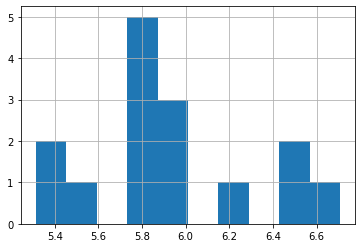

In [7]:
df['clean'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()
plt.show()

In [8]:
df['clean'] = df['clean'].apply(lambda x: word_tokenize(str(x)))

In [9]:
tweets = [word for tweet in df['clean'] for word in tweet]

In [10]:
fqdist = FreqDist(tweets)
print(fqdist)

<FreqDist with 285 samples and 473 outcomes>


In [11]:
most_common_word = fqdist.most_common(20)

print(most_common_word)

[('wilayah', 6), ('selatan', 6), ('gunung', 6), ('sungai', 6), ('banda', 6), ('bumi', 6), ('danau', 6), ('barat', 5), ('indonesia', 5), ('bentuk', 5), ('kawasan', 5), ('alam', 5), ('hidup', 5), ('merdeka', 4), ('asiaafrika', 4), ('tinggi', 4), ('laut', 4), ('tanah', 4), ('legenda', 4), ('saksi', 4)]


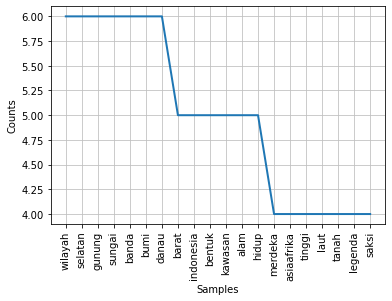

In [12]:
fqdist.plot(20,cumulative=False)

plt.show()

In [13]:
result = pd.Series(nltk.ngrams(tweets, 2)).value_counts()[:20]
print(result)

(muka, laut)                3
(gunung, tangkuban)         3
(sungai, citarum)           3
(alam, hidup)               3
(provinsi, jawa)            2
(benda, mati)               2
(ha, tambah)                2
(tangkuban, parahu)         2
(luas, wilayah)             2
(tanggal, april)            2
(banda, alam)               2
(hidup, benda)              2
(indung, bumi)              2
(konferensi, asiaafrika)    2
(banda, indung)             2
(hidup, banda)              2
(gubernur, jenderal)        2
(meter, muka)               2
(tinggi, meter)             2
(keliling, gunung)          2
dtype: int64


In [14]:
''' Analisis :
1. Distribusi frekuensi karakter per tweet : distribusi terbanyak berada pada 130-160 dan 220-250 karakter pertweet
2. Distribusi panjang kata per tweet : distribusi terbanyak berada di rentang 20 - 50 kata per tweet, tidak ada tweet dibawah 10 kata
3. Distribusi panjang rata-rata kata per tweet : distribusi terbanyak berada pada 5.8 sampai 6 karakter per kata per tweet
4. Distribusi frekuensi kata : wilayah, selatan, gunung, sungai, banda, bumi, dan danau merupakan kata yang paling sering keluar diikuti dengan kata-kata berikutnya yang merepresentasikan Jawa Barat dan bentang alamnya
5. Distribusi bi-gram : distribusi b-ram memperjelas topik yang dibicarakan dalam tweet adalah mengenai kota Bandung : sejarah dan alamnya
'''

' Analisis :\n1. Distribusi frekuensi karakter per tweet : distribusi terbanyak berada pada 130-160 dan 220-250 karakter pertweet\n2. Distribusi panjang kata per tweet : distribusi terbanyak berada di rentang 20 - 50 kata per tweet, tidak ada tweet dibawah 10 kata\n3. Distribusi panjang rata-rata kata per tweet : distribusi terbanyak berada pada 5.8 sampai 6 karakter per kata per tweet\n4. Distribusi frekuensi kata : wilayah, selatan, gunung, sungai, banda, bumi, dan danau merupakan kata yang paling sering keluar diikuti dengan kata-kata berikutnya yang merepresentasikan Jawa Barat dan bentang alamnya\n5. Distribusi bi-gram : distribusi b-ram memperjelas topik yang dibicarakan dalam tweet adalah mengenai kota Bandung : sejarah dan alamnya\n'